# Clustering with K-Means

The K-means algorithm is not difficult to implement. The steps are as follows:

- Define the metric that the clustering should be based on, i.e. write a function that takes two observations as arguments and returns the distance between them
- Decide on how many clusters there should be, i.e. choose $k$
- Choose random observations for the initial centroids
- Repeat the following steps until no centroid is moving:
    - Group all observations by which centroid they are closest to
    - Move the centroid to the mean of all the observations in its group
    
Think about the following questions:

- Will the K-means algorithm always converge, i.e. will we reach a point where the centroids are no longer moving?
- Will we always reach the same clustering with the algorithm?
- If we have a dataset which naturally is split into clusters and we choose k to be higher than the number of natural clusters, what happens?
- What if we choose k to be lower than the number of natural clusters?
- Can you think of a situation where K-means ends up with a very bad clustering?

Try to implement the algorithm on the Iris dataset. Since this is supervised learning we will not use the labels.

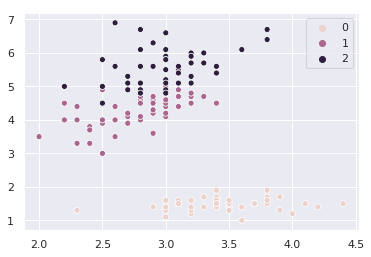

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

iris = datasets.load_iris()
sns.scatterplot(iris.data[:,1], iris.data[:,2], hue=iris.target)

We will set $k=3$ and start by initializing the centroids to be the first three points in the data. All the points will initially be set to belong to the first centroid and the distance function will be euclidian distance.

In [0]:
import math
import numpy as np

k=3
c=[]
for i in range(k):
  c.append(iris.data[i,:])
  
groups=[0 for i in range(iris.data.shape[0])]
  
def dist(a, b):
  return math.sqrt(sum((a-b)*(a-b)))

The actual algorithm can be implemented in just a few lines of code

In [0]:
moved=True
while moved:
  moved=False
  sums=np.zeros((k,iris.data.shape[1]))
  group_counts=np.zeros((k))
  for i in range(iris.data.shape[0]):
    closest=np.argmin(list(map(lambda x: dist(x, iris.data[i]) , c)))
    if not closest == groups[i]:
      moved=True
    groups[i]=closest
    sums[closest, :] += iris.data[i]
    group_counts[closest] += 1
  c=sums/group_counts.reshape(3,1)

We can plot the clusters and since the data has four dimensions we can make subplots of all the features agains each other.

AxesSubplot(0.125,0.71587;0.168478x0.16413)
AxesSubplot(0.327174,0.71587;0.168478x0.16413)
AxesSubplot(0.529348,0.71587;0.168478x0.16413)
AxesSubplot(0.731522,0.71587;0.168478x0.16413)
AxesSubplot(0.125,0.518913;0.168478x0.16413)
AxesSubplot(0.327174,0.518913;0.168478x0.16413)
AxesSubplot(0.529348,0.518913;0.168478x0.16413)
AxesSubplot(0.731522,0.518913;0.168478x0.16413)
AxesSubplot(0.125,0.321957;0.168478x0.16413)
AxesSubplot(0.327174,0.321957;0.168478x0.16413)
AxesSubplot(0.529348,0.321957;0.168478x0.16413)
AxesSubplot(0.731522,0.321957;0.168478x0.16413)
AxesSubplot(0.125,0.125;0.168478x0.16413)
AxesSubplot(0.327174,0.125;0.168478x0.16413)
AxesSubplot(0.529348,0.125;0.168478x0.16413)
AxesSubplot(0.731522,0.125;0.168478x0.16413)


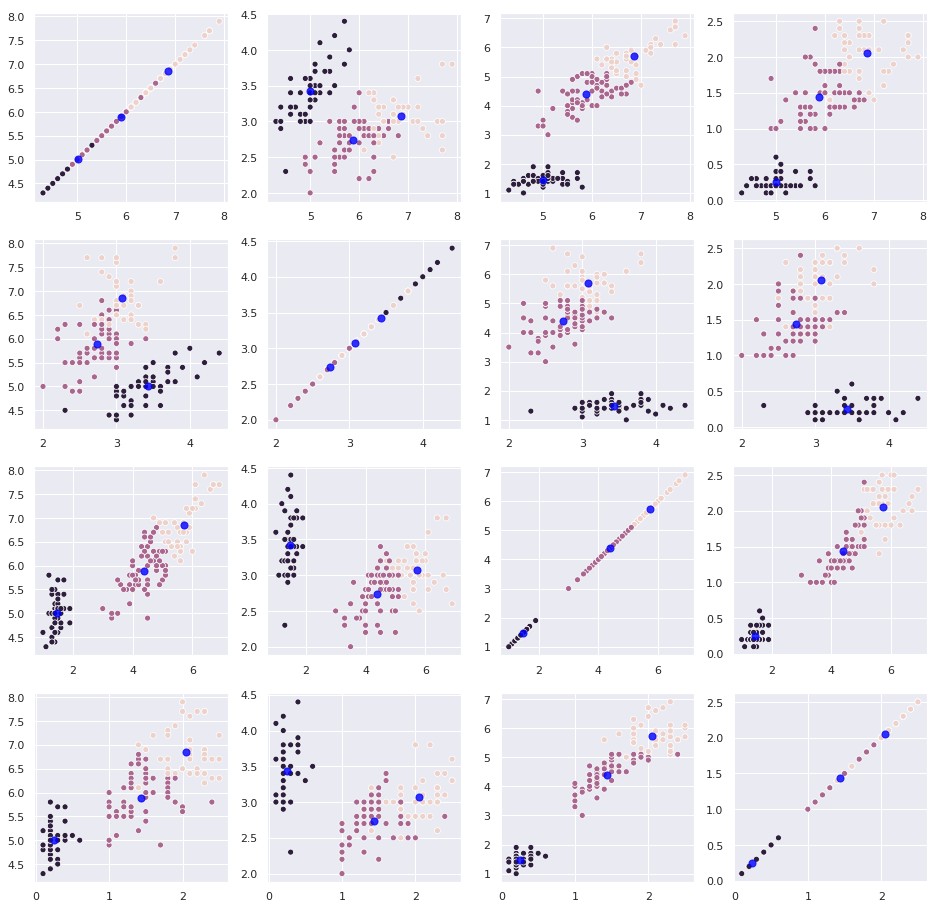

In [155]:
fig, ps = plt.subplots(4,4, figsize=(16,16))
for x_axis in range(4):
  for y_axis in range(4):
    p=sns.scatterplot(iris.data[:,x_axis], iris.data[:,y_axis], hue=groups, ax=ps[x_axis][y_axis], legend=False)
    print(p)
    for i in range(k):
      p.scatter([c[i][x_axis]], [c[i][y_axis]], c='blue', s=50, alpha=0.8)